# データ作成

結合するデータは3個  
* Sentinel2の秋田大豆裸地のデータ　座標しかないからポリゴンに結合必要　uniqueIDを振ったのでさらにエクセルと結合して必要な値を与える
/workspaces/akita_daizu/data/sentinel_band0601.geojson  
このGeojsonをさらに下のエクセルと結合  
/workspaces/akita_daizu/data/0124修正_土壌データ+収量.xlsx  
* 田中先生からもらったCS 教師データプラス　これの整形も必要  
/workspaces/akita_daizu/data/土壌成分_波長_教師データ.csv

In [1]:
import geopandas as gpd
import pandas as pd
akita_polygon = gpd.read_file('/workspaces/akita_daizu/data/sentunel_band0601.geojson')
akita_data = pd.read_excel('/workspaces/akita_daizu/data/0208修正_土壌データ+収量.xlsx')

train_data = pd.read_csv('/workspaces/akita_daizu/data/土壌成分_波長_教師データ.csv')

In [2]:
#　まずこのデータから不要な列を削除
akita_data

,圃場番号,現場測定_EC(㎳／㎝),現場測定_PH,土壌硬度_1_mean,土壌硬度_2_mean,土壌硬度_3_mean,土壌硬度_4_mean,土壌硬度_5_mean,土壌硬度_6_mean,土壌硬度_7_mean,...,15%反収現物重量kg/10a,実験室測定_EC(㎳／㎝),実験室測定_pH,アンモニア態窒素(mgN/100g),硝酸態窒素(mgN/100g),可給隊窒素(mgN/100g),有効態リン酸(mgP2O5/100g),TC(%),腐食(%),TN(%)
0,1.0,0.028,7.36,285,486,650,779,822,887,959,...,130.0,0.041,7.26,1.53,0.62,4.40,9.254784,1.00,1.72,0.106
1,2.0,0.031,6.42,232,232,232,232,232,232,232,...,NaN,0.035,6.42,1.55,1.36,2.30,5.487849,0.27,0.46,0.033
2,3.0,0.027,6.30,232,232,232,232,247,334,421,...,NaN,0.029,6.56,1.58,0.13,3.85,3.987462,0.36,0.62,0.040
3,4.0,0.017,6.49,232,289,325,370,411,507,669,...,NaN,0.025,6.87,1.22,0.11,4.43,7.745272,0.46,0.79,0.047
4,5.0,0.058,6.69,232,295,398,579,728,1149,1336,...,138.0,0.042,7.03,1.20,0.32,4.76,20.179763,0.82,1.41,0.085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,117.0,0.034,5.83,362,375,375,372,411,494,689,...,NaN,0.047,6.04,2.27,0.46,8.55,19.738727,4.34,7.46,0.329
109,118.0,0.028,5.46,232,237,239,239,239,239,382,...,NaN,0.050,5.50,1.86,1.22,2.98,9.160018,4.12,7.09,0.295
110,119.0,0.044,5.70,365,376,376,440,463,516,573,...,NaN,0.048,6.09,1.79,0.39,7.03,30.115342,3.89,6.69,0.279
111,120.0,0.055,6.06,670,652,630,682,598,733,749,...,NaN,0.048,6.30,1.76,0.59,8.27,25.852747,3.20,5.50,0.241


In [3]:
akita_data.columns

Index(['圃場番号', '現場測定_EC(㎳／㎝)', '現場測定_PH', '土壌硬度_1_mean', '土壌硬度_2_mean',
       '土壌硬度_3_mean', '土壌硬度_4_mean', '土壌硬度_5_mean', '土壌硬度_6_mean',
       '土壌硬度_7_mean', '土壌硬度_8_mean', '土壌硬度_9_mean', '土壌硬度_10_mean',
       '土壌硬度_11_mean', '土壌硬度_12_mean', '土壌硬度_13_mean', '土壌硬度_14_mean',
       '土壌硬度_15_mean', '土壌硬度_16_mean', '土壌硬度_17_mean', '土壌硬度_18_mean',
       '土壌硬度_19_mean', '土壌硬度_20_mean', '土壌硬度_21_mean', '土壌硬度_22_mean',
       '土壌硬度_23_mean', '土壌硬度_24_mean', '土壌硬度_25_mean', '土壌硬度_26_mean',
       '土壌硬度_27_mean', '土壌硬度_28_mean', '土壌硬度_29_mean', '土壌硬度_30_mean',
       '土壌硬度_31_mean', '土壌硬度_32_mean', '土壌硬度_33_mean', '土壌硬度_34_mean',
       '土壌硬度_35_mean', '土壌硬度_36_mean', '土壌硬度_37_mean', '土壌硬度_38_mean',
       '土壌硬度_39_mean', '土壌硬度_40_mean', '土壌硬度_41_mean', '土壌硬度_42_mean',
       '土壌硬度_43_mean', '土壌硬度_44_mean', '土壌硬度_45_mean', '土壌硬度_46_mean',
       '土壌硬度_47_mean', '土壌硬度_48_mean', '土壌硬度_49_mean', '土壌硬度_50_mean',
       '土壌硬度_51_mean', '土壌硬度_52_mean', '土壌硬度_53_mean', '土壌硬度_54_mean',
       '土壌硬度

In [4]:
akita_data['uniqueID'] = akita_data['圃場番号']
merge_akita_data = akita_data[[
    'uniqueID', '実験室測定_EC(㎳／㎝)', '実験室測定_pH',
       'アンモニア態窒素(mgN/100g)', '硝酸態窒素(mgN/100g)', '可給隊窒素(mgN/100g)',
       '有効態リン酸(mgP2O5/100g)', 'TC(%)', '腐食(%)', 'TN(%)'
    ]]


In [5]:
merge_akita_data

,uniqueID,実験室測定_EC(㎳／㎝),実験室測定_pH,アンモニア態窒素(mgN/100g),硝酸態窒素(mgN/100g),可給隊窒素(mgN/100g),有効態リン酸(mgP2O5/100g),TC(%),腐食(%),TN(%)
0,1.0,0.041,7.26,1.53,0.62,4.40,9.254784,1.00,1.72,0.106
1,2.0,0.035,6.42,1.55,1.36,2.30,5.487849,0.27,0.46,0.033
2,3.0,0.029,6.56,1.58,0.13,3.85,3.987462,0.36,0.62,0.040
3,4.0,0.025,6.87,1.22,0.11,4.43,7.745272,0.46,0.79,0.047
4,5.0,0.042,7.03,1.20,0.32,4.76,20.179763,0.82,1.41,0.085
...,...,...,...,...,...,...,...,...,...,...
108,117.0,0.047,6.04,2.27,0.46,8.55,19.738727,4.34,7.46,0.329
109,118.0,0.050,5.50,1.86,1.22,2.98,9.160018,4.12,7.09,0.295
110,119.0,0.048,6.09,1.79,0.39,7.03,30.115342,3.89,6.69,0.279
111,120.0,0.048,6.30,1.76,0.59,8.27,25.852747,3.20,5.50,0.241


In [6]:
merged_akita = pd.merge(akita_polygon, merge_akita_data, on=['uniqueID'], how='outer')
merged_akita.sort_values(['uniqueID'])

,field_1,id,longitude,latitude,time,B1,B2,B3,B4,B5,...,geometry,実験室測定_EC(㎳／㎝),実験室測定_pH,アンモニア態窒素(mgN/100g),硝酸態窒素(mgN/100g),可給隊窒素(mgN/100g),有効態リン酸(mgP2O5/100g),TC(%),腐食(%),TN(%)
433,1,20210601T012659_20210601T012656_T54TVK,140.022335,40.268375,2021-06-01,664,761,1060,1024,1686,...,POINT (-68975.901 30112.177),0.041,7.26,1.53,0.62,4.40,9.254784,1.00,1.72,0.106
6,1,20210601T012659_20210601T012656_T54TVK,140.022065,40.271070,2021-06-01,604,1082,1332,1376,1597,...,POINT (-68996.083 30411.608),0.035,6.42,1.55,1.36,2.30,5.487849,0.27,0.46,0.033
0,1,20210601T012659_20210601T012656_T54TVK,140.023143,40.271609,2021-06-01,534,765,1120,916,1684,...,POINT (-68903.856 30470.614),0.029,6.56,1.58,0.13,3.85,3.987462,0.36,0.62,0.040
7,1,20210601T012659_20210601T012656_T54TVK,140.022335,40.271878,2021-06-01,515,629,912,818,1526,...,POINT (-68972.342 30501.165),0.025,6.87,1.22,0.11,4.43,7.745272,0.46,0.79,0.047
13,1,20210601T012659_20210601T012656_T54TVK,140.022245,40.272058,2021-06-01,515,622,821,767,1305,...,POINT (-68979.799 30521.183),0.042,7.03,1.20,0.32,4.76,20.179763,0.82,1.41,0.085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1,20210601T012659_20210601T012656_T54TVK,140.072191,40.299996,2021-06-01,429,578,866,731,1491,...,POINT (-64705.376 33585.437),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,1,20210601T012659_20210601T012656_T54TVK,140.069227,40.265590,2021-06-01,498,738,1106,1104,1808,...,POINT (-64990.329 29767.546),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,1,20210601T012659_20210601T012656_T54TVK,140.077401,40.273495,2021-06-01,420,648,910,803,1371,...,POINT (-64287.549 30639.299),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,1,20210601T012659_20210601T012656_T54TVK,140.088002,40.273675,2021-06-01,385,621,927,785,1259,...,POINT (-63385.895 30651.612),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
merged_akita = merged_akita[~merged_akita.duplicated()]

In [8]:
len(merged_akita['geometry'].unique())

474

In [9]:
# 不要な波長とかの削除
# 必要な波長　2、3、4、8、11、12
merged_akita.columns

Index(['field_1', 'id', 'longitude', 'latitude', 'time', 'B1', 'B2', 'B3',
       'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'AOT', 'WVP',
       'SCL', 'TCI_R', 'TCI_G', 'TCI_B', 'MSK_CLDPRB', 'MSK_SNWPRB', 'QA10',
       'QA20', 'QA60', 'uniqueID', 'geometry', '実験室測定_EC(㎳／㎝)', '実験室測定_pH',
       'アンモニア態窒素(mgN/100g)', '硝酸態窒素(mgN/100g)', '可給隊窒素(mgN/100g)',
       '有効態リン酸(mgP2O5/100g)', 'TC(%)', '腐食(%)', 'TN(%)'],
      dtype='object')

In [10]:
# 列名修正　教師データと結合するために同じ名前にする
merged_akita['NH4'] = merged_akita['アンモニア態窒素(mgN/100g)']
merged_akita['NO3'] = merged_akita['硝酸態窒素(mgN/100g)']
merged_akita['AvailN'] = merged_akita['可給隊窒素(mgN/100g)']
merged_akita['AvailP1'] = merged_akita['有効態リン酸(mgP2O5/100g)']
merged_akita['TC'] = merged_akita['TC(%)']
merged_akita['TN'] = merged_akita['TN(%)']
merged_akita['EC'] = merged_akita['実験室測定_EC(㎳／㎝)']
merged_akita['pH1'] = merged_akita['実験室測定_pH']


In [11]:
target_akita = merged_akita[['uniqueID', 'longitude', 'latitude', 'B2', 'B3',
    'B4', 'B8', 'B11', 'B12',
    # 'AOT', 'WVP','SCL', 'TCI_R', 'TCI_G', 'TCI_B', 
    # 'MSK_CLDPRB', 'MSK_SNWPRB', 'QA10','QA20', 'QA60', 
    'EC', 'pH1',
    'NH4', 'NO3', 'AvailN',
    'AvailP1', 'TC', '腐食(%)', 'TN','geometry']]

In [12]:
target_akita

,uniqueID,longitude,latitude,B2,B3,B4,B8,B11,B12,EC,pH1,NH4,NO3,AvailN,AvailP1,TC,腐食(%),TN,geometry
0,3.0,140.023143,40.271609,765,1120,916,3237,1878,1283,0.029,6.56,1.58,0.13,3.85,3.987462,0.36,0.62,0.040,POINT (-68903.856 30470.614)
1,104.0,140.079917,40.280592,702,940,971,2481,2169,1451,0.060,6.09,1.80,1.17,5.57,37.829582,3.83,6.59,0.294,POINT (-64066.938 31425.426)
2,105.0,140.080186,40.280862,672,915,997,2408,2258,1536,0.046,6.32,1.77,1.08,4.78,23.590608,3.60,6.19,0.270,POINT (-64043.767 31455.153)
3,106.0,140.080366,40.281041,813,1108,1124,2910,2399,1747,0.050,6.37,1.69,1.24,6.63,36.581937,3.57,6.14,0.260,POINT (-64028.319 31474.971)
4,10.0,140.022335,40.275292,747,1001,986,2592,1891,1273,0.036,6.98,1.82,0.23,4.04,16.857091,0.93,1.60,0.076,POINT (-68968.874 30880.179)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,41.0,140.059884,40.293887,589,851,785,2499,2287,1519,0.040,6.45,1.83,0.66,4.50,23.004637,4.85,8.34,0.315,POINT (-65757.531 32916.263)
471,44.0,140.059435,40.294785,633,962,885,2643,2179,1470,0.043,6.52,2.01,0.94,5.33,17.877627,3.61,6.21,0.290,POINT (-65794.847 33016.337)
472,37.0,140.056920,40.293169,619,940,924,2749,2052,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-66010.265 32838.675)
473,75.0,140.067430,40.282479,549,795,710,2461,1554,935,0.051,6.36,1.79,2.47,4.23,50.009644,3.20,5.50,0.251,POINT (-65126.937 31643.983)


In [13]:
# nullチェック 予測したいポリゴンだけ予測したいパラメータがnull
print(target_akita.isnull().sum())

uniqueID     352
longitude      0
latitude       0
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
EC           361
pH1          361
NH4          361
NO3          361
AvailN       361
AvailP1      361
TC           361
腐食(%)        361
TN           361
geometry       0
dtype: int64


In [14]:
# 学習データの整理完了
target_akita

,uniqueID,longitude,latitude,B2,B3,B4,B8,B11,B12,EC,pH1,NH4,NO3,AvailN,AvailP1,TC,腐食(%),TN,geometry
0,3.0,140.023143,40.271609,765,1120,916,3237,1878,1283,0.029,6.56,1.58,0.13,3.85,3.987462,0.36,0.62,0.040,POINT (-68903.856 30470.614)
1,104.0,140.079917,40.280592,702,940,971,2481,2169,1451,0.060,6.09,1.80,1.17,5.57,37.829582,3.83,6.59,0.294,POINT (-64066.938 31425.426)
2,105.0,140.080186,40.280862,672,915,997,2408,2258,1536,0.046,6.32,1.77,1.08,4.78,23.590608,3.60,6.19,0.270,POINT (-64043.767 31455.153)
3,106.0,140.080366,40.281041,813,1108,1124,2910,2399,1747,0.050,6.37,1.69,1.24,6.63,36.581937,3.57,6.14,0.260,POINT (-64028.319 31474.971)
4,10.0,140.022335,40.275292,747,1001,986,2592,1891,1273,0.036,6.98,1.82,0.23,4.04,16.857091,0.93,1.60,0.076,POINT (-68968.874 30880.179)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,41.0,140.059884,40.293887,589,851,785,2499,2287,1519,0.040,6.45,1.83,0.66,4.50,23.004637,4.85,8.34,0.315,POINT (-65757.531 32916.263)
471,44.0,140.059435,40.294785,633,962,885,2643,2179,1470,0.043,6.52,2.01,0.94,5.33,17.877627,3.61,6.21,0.290,POINT (-65794.847 33016.337)
472,37.0,140.056920,40.293169,619,940,924,2749,2052,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-66010.265 32838.675)
473,75.0,140.067430,40.282479,549,795,710,2461,1554,935,0.051,6.36,1.79,2.47,4.23,50.009644,3.20,5.50,0.251,POINT (-65126.937 31643.983)


In [15]:
# 教師データの整理をどのタイミングでするか？　
# 結合した後にDropすると学習データまで落としてしまうので、学習するたびに必要なデータを結合する方法に変更
train_data.columns

Index(['no', 'id1', 'id2', 'Date', 'Pref', 'Location', 'LandUse', 'Crop',
       'Farmer', 'Collector', 'Field name in KSAS', 'x', 'y', 'x_53n', 'y_53n',
       'dsm_AW3D30', 'AcquisitionDate_S2', 'B2', 'B3', 'B4', 'B8', 'B11',
       'B12', 'AcquisitionId_S1', 'type', 'VV', 'VH', 'Layer', 'pH1', 'pH2',
       'EC', 'Y1', 'Humus', 'CS', 'FS', 'Sand', 'Silt', 'Clay', 'TC', 'TN',
       'CEC', 'CaO', 'MgO', 'K2O', 'Na2O', 'BaseSaturation', 'PAcidAbsCoef',
       'AvailP1', 'AvailP2', 'AvailSi1', 'AvailSi2', 'HotAvailN', 'AvailN',
       'UplandAvailN', 'NH4', 'NO3', 'InorgN', 'FreeIron', 'WaterExB', 'Mn',
       'SoilTypeName3', 'SoilTypeNum', 'SoilTypeName2', 'SoilTaxon'],
      dtype='object')

In [16]:
droped_train_data = train_data[[
    'B2', 'B3', 'B4', 'B8', 'B11','B12',
    'pH1','EC',
    'NH4', 'NO3', 'AvailN',
    'AvailP1', 'TC', 'TN',
]]
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
droped_train_data = droped_train_data.dropna(subset=band_cols)
# 学習データと比べて、教師データはバンド値が10000分の1なので

droped_train_data[band_cols] = droped_train_data[band_cols] * 10000

In [17]:
# 教師データの整形完了、concatは学習させるタイミングで実施
droped_train_data

,B2,B3,B4,B8,B11,B12,pH1,EC,NH4,NO3,AvailN,AvailP1,TC,TN
0,543.0,621.0,777.0,1232.0,2202.0,1611.0,5.51,0.07,0.946,0.105,NaN,9.458,3.867726,0.331129
1,584.0,707.0,929.0,1482.0,2236.0,1707.0,5.28,0.05,1.039,0.208,NaN,4.155,3.208708,0.267248
2,813.0,907.0,1250.0,1996.0,2866.0,2408.0,5.67,0.05,0.932,0.311,NaN,10.360,2.859232,0.240865
3,453.0,531.0,717.0,1250.0,2204.0,1524.0,5.69,0.08,0.952,0.106,NaN,10.575,3.996550,0.320280
4,689.0,871.0,1148.0,1844.0,2560.0,1965.0,5.66,0.05,1.149,0.104,NaN,3.134,2.754002,0.241536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,1130.0,1390.0,1832.0,2555.0,3803.0,3539.0,5.96,5.09,NaN,NaN,17.776014,NaN,5.704551,NaN
1181,1046.0,1302.0,1710.0,2476.0,3740.0,3431.0,5.94,5.40,NaN,NaN,8.528544,NaN,5.688195,NaN
1182,1120.0,1534.0,2082.0,2724.0,3740.0,3142.0,6.10,4.11,NaN,NaN,13.546059,NaN,2.639054,NaN
1183,550.0,810.0,1058.0,1474.0,2214.0,1676.0,5.72,3.70,NaN,NaN,9.177537,NaN,2.754787,NaN


# 組み合わせた教師・学習データから予測

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# 予測データ結合用DFの作成
pred_df = target_akita.reset_index(drop=True).copy()

pipeline作成

In [21]:
'''
ランダムフォレスト、勾配ブースティング、XGBoostの3モデル比較
交差検証 Repeated Kfold
Gridsearch n_estimatorsとmax_depth　estimatorsは指定しなくても良いと思う early stopを入れる
'''

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost

def rmse(y_true, y_pred):
    # squared = false の時 RMSEになる
    return mean_squared_error(y_true, y_pred, squared=False)

# build pipeline
def build_pipelines():
    random_seed = 42
    pipelines = {
        'Rfr':
            Pipeline([('scl',StandardScaler()),
                    ('est',RandomForestRegressor(random_state=random_seed))]),
        'Gbr':
            Pipeline([('scl',StandardScaler()),
                    ('est',GradientBoostingRegressor(random_state=random_seed))]),
        'Xgb':
            Pipeline([('scl',StandardScaler()),
                    ('est',xgboost.XGBRegressor(random_state=random_seed))])
    }
    return(pipelines)

def pipe_score_predict(XX, YY, pred_df):
    train_x, test_x, train_y, test_y = train_test_split(
        XX, YY, test_size=0.3, random_state=42, shuffle=True)

    
    scores = pd.DataFrame()
    preds_df = pd.DataFrame()
    plot_data = pd.DataFrame()

    pipelines =  build_pipelines()

    for pipe_name, pipeline in pipelines.items():
        rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
        rf_tune_params = {'est__n_estimators': [8, 16, 32, 64, 128, 256, 512],
                        'est__max_depth': [2,4,6]}
        clf_pipeline = GridSearchCV(pipeline,rf_tune_params, cv=rkf, refit=True)
        clf_pipeline.fit(train_x, train_y)
        scores.loc[pipe_name,'train_rmse'] = rmse(train_y, clf_pipeline.predict(train_x))
        scores.loc[pipe_name,'test_rmse'] = rmse(test_y, clf_pipeline.predict(test_x))
        scores.loc[pipe_name,'train_r2_score'] = r2_score(train_y, clf_pipeline.predict(train_x))
        scores.loc[pipe_name,'test_r2_score'] = r2_score(test_y, clf_pipeline.predict(test_x))

        best_model = clf_pipeline.best_estimator_
        
        #3モデルの予測値をｄｆに格納
        preds_df["pred" + pipe_name + target_col] = best_model.predict(pred_df[band_cols])

    #　3モデル予測値の平均を予測値として代入
    pred_df["pred" + target_col] = preds_df.mean(axis=1)

    
    return(scores, pred_df)

## ｐHの予測

In [22]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'pH1'
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [23]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    934
latitude     934
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
pH1            0
dtype: int64

In [24]:
# pH異常値除去
ｄ = ｄ.drop(ｄ[ｄ['pH1']>7.9].index)

In [25]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)

RandomForestRegressor(random_state=42)

In [177]:
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.1292326376676434
rsquared: 0.4952957958839421


In [178]:
# パイプラインでの予測 RMSEをNUMPYで計算
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.070801,0.138558,0.671134,0.458877
Gbr,0.028619,0.140426,0.867069,0.451581
Xgb,0.032149,0.122779,0.850670,0.520498


In [181]:
# パイプラインでの予測 True
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores


,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.070801,0.138558,0.671134,0.458877
Gbr,0.028619,0.140426,0.867069,0.451581
Xgb,0.032149,0.122779,0.850670,0.520498


In [183]:
# パイプラインでの予測 False
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores


,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.266085,0.372234,0.671134,0.458877
Gbr,0.169170,0.374735,0.867069,0.451581
Xgb,0.179302,0.350399,0.850670,0.520498


In [184]:
pH_score, pH_pred_df = scores, pred_df

In [185]:
# 計算結果格納用のからDF作成
score_df = pd.DataFrame()

In [186]:
score_df['pH_score'] = pH_score.mean()


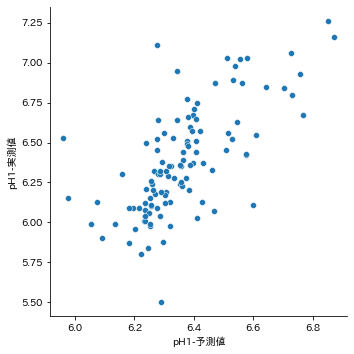

In [188]:
import japanize_matplotlib

plot_columns = pred_df.dropna(subset=[target_col])
preds_x = pred_df["pred" + target_col]
test_y = pred_df[target_col]
p = sns.relplot(x=preds_x, y=test_y)
p.set_axis_labels(f"{target_col}-予測値", f"{target_col}-実測値")

## EC の単位にブレアリ　要修正　ECの予測

In [249]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'EC'

droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [250]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    934
latitude     934
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
EC             0
dtype: int64

In [251]:
# 異常値除去
ｄ = ｄ.drop(ｄ[ｄ[target_col]>0.2].index)

In [252]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.0004284699253881223
rsquared: 0.4438461145990079


In [253]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.02069951510031388
rsquared: 0.4438461145990079


In [254]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.012784,0.021177,0.673138,0.417910
Gbr,0.011491,0.021469,0.735924,0.401729
Xgb,0.010779,0.020490,0.767636,0.455054


In [194]:
EC_score, EC_pred_df = scores, pred_df

In [195]:
score_df['EC_score'] = EC_score.mean()
score_df

,pH_score,EC_score
train_rmse,0.204852,0.000137
test_rmse,0.365789,0.000443
train_r2_score,0.796291,0.725566
test_r2_score,0.476985,0.424898


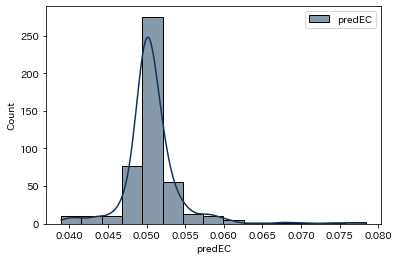

In [196]:
import matplotlib.pyplot as plt
t = 'predEC'
sns.histplot(
    AvailP_pred_df[t], bins=15, color='#123456', label=t,
    kde=True
)
plt.legend() # 凡例を表示
plt.show()

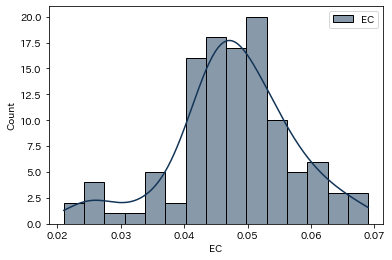

In [197]:
import matplotlib.pyplot as plt
t = 'EC'
sns.histplot(
    AvailP_pred_df[t], bins=15, color='#123456', label=t,
    kde=True
)
plt.legend() # 凡例を表示
plt.show()

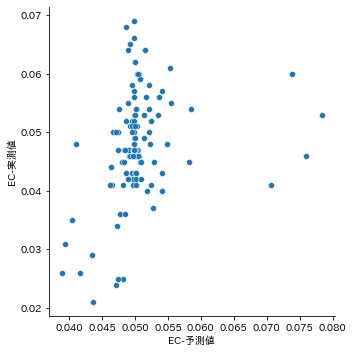

In [198]:
import japanize_matplotlib
plot_columns = pred_df.dropna(subset=[target_col])
preds_x = pred_df["pred" + target_col]
test_y = pred_df[target_col]
p = sns.relplot(x=preds_x, y=test_y)
p.set_axis_labels(f"{target_col}-予測値", f"{target_col}-実測値")

## NH4の予測

In [199]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'NH4'

droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [200]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    983
latitude     983
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
NH4            0
dtype: int64

In [201]:
# 異常値除去　教師データに異常値とも取れる高い値が多い印象。　
# ｄ = ｄ.drop(ｄ[ｄ[target_col]>4].index)
#　除去しない方が精度良い

In [202]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.3348416701657629
rsquared: 0.18983809650685024


In [203]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.226522,0.341578,0.492508,0.173540
Gbr,0.348022,0.374017,0.220303,0.095052
Xgb,0.322248,0.374427,0.278046,0.094059


In [204]:
NH4_score, NH4_pred_df = scores, pred_df

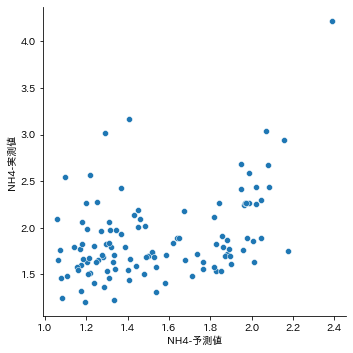

In [205]:
import japanize_matplotlib
plot_columns = pred_df.dropna(subset=[target_col])
preds = pred_df["pred" + target_col]
test_y = pred_df[target_col]
p = sns.relplot(x=preds, y=test_y)
p.set_axis_labels(f"{target_col}-予測値", f"{target_col}-実測値")

## NO3の予測

In [206]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'NO3'
#
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [207]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    983
latitude     983
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
NO3            0
dtype: int64

In [208]:
# 異常値除去
ｄ = ｄ.drop(ｄ[ｄ[target_col]>3.5].index)

In [209]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.17731127768467797
rsquared: 0.19513540746337876


In [210]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.116884,0.186780,0.517048,0.152155
Gbr,0.134793,0.198742,0.443051,0.097854
Xgb,0.130823,0.201826,0.459455,0.083858


In [211]:
NO3_score, NO3_pred_df = scores, pred_df


In [212]:
score_df['NO3_score'] = NO3_score.mean()
score_df

,pH_score,EC_score,NO3_score
train_rmse,0.204852,0.000137,0.127500
test_rmse,0.365789,0.000443,0.195783
train_r2_score,0.796291,0.725566,0.473185
test_r2_score,0.476985,0.424898,0.111289


In [213]:
NO3_score

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.116884,0.186780,0.517048,0.152155
Gbr,0.134793,0.198742,0.443051,0.097854
Xgb,0.130823,0.201826,0.459455,0.083858


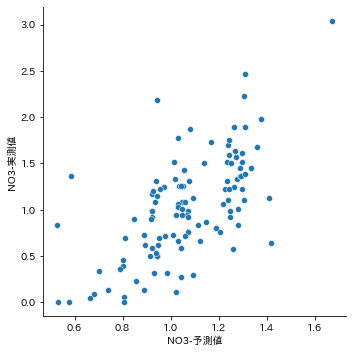

In [214]:
import japanize_matplotlib
plot_columns = pred_df.dropna(subset=[target_col])
preds = pred_df["pred" + target_col]
test_y = pred_df[target_col]
p = sns.relplot(x=preds, y=test_y)
p.set_axis_labels(f"{target_col}-予測値", f"{target_col}-実測値")

## AvailNの予測

In [215]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'AvailN'
#
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [216]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    905
latitude     905
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
AvailN         0
dtype: int64

In [217]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 7.711565638820213
rsquared: 0.38728711990097353


In [218]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,7.803992,8.955513,0.540540,0.288451
Gbr,2.867567,8.620561,0.831172,0.315064
Xgb,5.174640,9.166535,0.695343,0.271684


In [219]:
AvailN_score, AvailN_pred_df = scores, pred_df

In [220]:
score_df['AvailN_score'] = AvailN_score.mean()
score_df

,pH_score,EC_score,NO3_score,AvailN_score
train_rmse,0.204852,0.000137,0.127500,5.282066
test_rmse,0.365789,0.000443,0.195783,8.914203
train_r2_score,0.796291,0.725566,0.473185,0.689019
test_r2_score,0.476985,0.424898,0.111289,0.291733


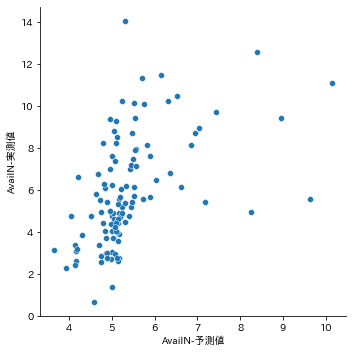

In [221]:
import japanize_matplotlib
plot_columns = pred_df.dropna(subset=[target_col])
preds = pred_df["pred" + target_col]
test_y = pred_df[target_col]
p = sns.relplot(x=preds, y=test_y)
p.set_axis_labels(f"{target_col}-予測値", f"{target_col}-実測値")

## AvailPの予測

In [222]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'AvailP1'
#
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [223]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    884
latitude     884
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
AvailP1        0
dtype: int64

In [224]:
# 異常値除去
# ｄ = ｄ.drop(ｄ[ｄ[target_col]>200].index)

In [225]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 7985.187663691437
rsquared: 0.19463336430359068


In [226]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,2843.491200,8274.656662,0.589031,0.165438
Gbr,3340.296579,9023.408662,0.517227,0.089921
Xgb,2245.338019,9087.847294,0.675482,0.083422


In [227]:
AvailP_score, AvailP_pred_df = scores, pred_df

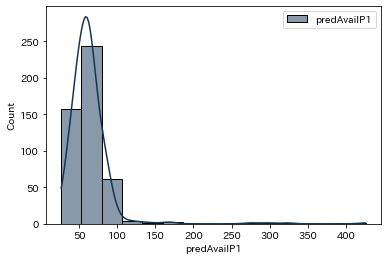

In [228]:
import matplotlib.pyplot as plt
sns.histplot(
    AvailP_pred_df['predAvailP1'], bins=15, color='#123456', label='predAvailP1',
    kde=True
)
plt.legend() # 凡例を表示
plt.show()

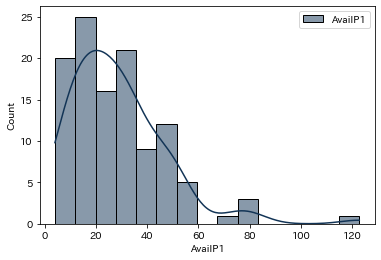

In [229]:
import matplotlib.pyplot as plt
sns.histplot(
    AvailP_pred_df['AvailP1'], bins=15, color='#123456', label='AvailP1',
    kde=True
)
plt.legend() # 凡例を表示
plt.show()

In [230]:
AvailP_pred_df

,uniqueID,longitude,latitude,B2,B3,B4,B8,B11,B12,EC,...,TN,geometry,predpH1,predEC,predNH4,predNO3,predAvailN,predAvailP1,predTC,predTN
0,3.0,140.023143,40.271609,765,1120,916,3237,1878,1283,0.029,...,0.040,POINT (-68903.856 30470.614),6.515323,0.043513,1.537041,0.739670,4.295100,29.223224,0.984321,0.078276
1,104.0,140.079917,40.280592,702,940,971,2481,2169,1451,0.060,...,0.294,POINT (-64066.938 31425.426),6.214794,0.050601,1.238167,0.920936,5.165275,36.233521,2.747207,0.237449
2,105.0,140.080186,40.280862,672,915,997,2408,2258,1536,0.046,...,0.270,POINT (-64043.767 31455.153),6.265614,0.049731,1.168129,1.047509,5.395468,64.452142,2.081207,0.196611
3,106.0,140.080366,40.281041,813,1108,1124,2910,2399,1747,0.050,...,0.260,POINT (-64028.319 31474.971),6.429461,0.047443,1.282738,0.971422,4.219363,69.900053,2.723402,0.220761
4,10.0,140.022335,40.275292,747,1001,986,2592,1891,1273,0.036,...,0.076,POINT (-68968.874 30880.179),6.538059,0.047738,1.295322,0.857890,5.014323,30.196171,1.594119,0.130562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,41.0,140.059884,40.293887,589,851,785,2499,2287,1519,0.040,...,0.315,POINT (-65757.531 32916.263),6.277952,0.051777,1.308219,1.123527,5.311815,80.051656,4.334195,0.242853
470,44.0,140.059435,40.294785,633,962,885,2643,2179,1470,0.043,...,0.290,POINT (-65794.847 33016.337),6.277745,0.048702,1.453152,1.046858,5.136665,56.243372,3.067570,0.244798
471,37.0,140.056920,40.293169,619,940,924,2749,2052,1300,NaN,...,NaN,POINT (-66010.265 32838.675),6.379563,0.050026,1.781483,1.026730,5.078821,51.760525,2.277746,0.213128
472,75.0,140.067430,40.282479,549,795,710,2461,1554,935,0.051,...,0.251,POINT (-65126.937 31643.983),6.387747,0.049978,1.388817,1.308849,5.077585,70.914194,2.856101,0.228963


In [231]:
score_df['AvailP_score'] = AvailP_score.mean()
score_df

,pH_score,EC_score,NO3_score,AvailN_score,AvailP_score
train_rmse,0.204852,0.000137,0.127500,5.282066,2809.708599
test_rmse,0.365789,0.000443,0.195783,8.914203,8795.304206
train_r2_score,0.796291,0.725566,0.473185,0.689019,0.593913
test_r2_score,0.476985,0.424898,0.111289,0.291733,0.112927


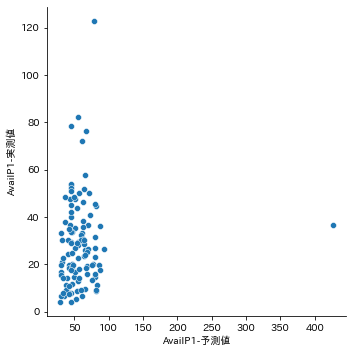

In [232]:
import japanize_matplotlib
plot_columns = pred_df.dropna(subset=[target_col])
preds = pred_df["pred" + target_col]
test_y = pred_df[target_col]
p = sns.relplot(x=preds, y=test_y)
p.set_axis_labels(f"{target_col}-予測値", f"{target_col}-実測値")

## TCの予測

In [233]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'TC'
#
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [234]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    859
latitude     859
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
TC             0
dtype: int64

In [235]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.6638701454617487
rsquared: 0.5325429546190801


In [236]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.463241,0.779259,0.672258,0.451293
Gbr,0.046792,0.674222,0.966894,0.525254
Xgb,0.032170,0.688901,0.977240,0.514918


In [237]:
TC_score, TC_pred_df = scores, pred_df

In [238]:
score_df['TC_score'] = TC_score.mean()
score_df

,pH_score,EC_score,NO3_score,AvailN_score,AvailP_score,TC_score
train_rmse,0.204852,0.000137,0.127500,5.282066,2809.708599,0.180734
test_rmse,0.365789,0.000443,0.195783,8.914203,8795.304206,0.714127
train_r2_score,0.796291,0.725566,0.473185,0.689019,0.593913,0.872131
test_r2_score,0.476985,0.424898,0.111289,0.291733,0.112927,0.497155


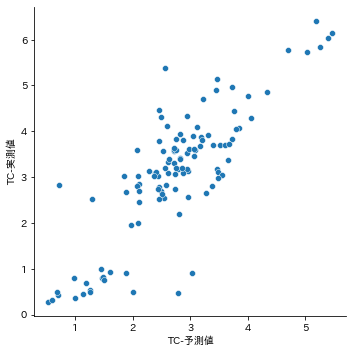

In [239]:
import japanize_matplotlib
plot_columns = pred_df.dropna(subset=[target_col])
preds = pred_df["pred" + target_col]
test_y = pred_df[target_col]
p = sns.relplot(x=preds, y=test_y)
p.set_axis_labels(f"{target_col}-予測値", f"{target_col}-実測値")

## TNの予測

In [240]:
lat_lon = ['longitude','latitude']
band_cols = ['B2', 'B3', 'B4', 'B8', 'B11', 'B12']
# ここを書き換える
target_col = 'TN'
#
droped_target_akita = target_akita[lat_lon + band_cols + [target_col]]
droped_train_data2 = droped_train_data.dropna(subset=[target_col])
droped_train_data2 = droped_train_data2[band_cols + [target_col]]
ddf_concat = pd.concat([droped_target_akita, droped_train_data2])

In [241]:
# 予測用のデータを分ける このpred_dに学習したモデルを適用して予測値をappendしていく
pred_d= ddf_concat[ddf_concat[target_col].isnull()]
# latlon 入っていない行は教師データ、教師データでも一部教師データがない列がある　concatする前にDropが必要
d = ddf_concat.dropna(subset=[target_col])
d.isna().sum()

longitude    789
latitude     789
B2             0
B3             0
B4             0
B8             0
B11            0
B12            0
TN             0
dtype: int64

In [242]:
train_x, test_x, train_y, test_y = train_test_split(d[band_cols], d[target_col], test_size=0.3, random_state=42, shuffle=True)

model = RandomForestRegressor(random_state=42)
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)
model.fit(train_x, train_y)
# gridsearch・交差検証してない予測
preds = model.predict(test_x)
print(f'rmse: {rmse(test_y, preds)}')
print(f'rsquared: {r2_score(test_y, preds)}')

rmse: 0.0029223028838781546
rsquared: 0.5758845527667475


In [243]:
# パイプラインでの予測
XX = d[band_cols]
YY = d[target_col]
scores, pred_df = pipe_score_predict(XX,YY,pred_df)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Rfr,0.001877,0.003509,0.732271,0.490796
Gbr,0.000042,0.003424,0.993977,0.503071
Xgb,0.000146,0.003758,0.979174,0.454601


In [244]:
TN_score, TN_pred_df = scores, pred_df

In [245]:
score_df['TN_score'] = TN_score.mean()
score_df

,pH_score,EC_score,NO3_score,AvailN_score,AvailP_score,TC_score,TN_score
train_rmse,0.204852,0.000137,0.127500,5.282066,2809.708599,0.180734,0.000688
test_rmse,0.365789,0.000443,0.195783,8.914203,8795.304206,0.714127,0.003564
train_r2_score,0.796291,0.725566,0.473185,0.689019,0.593913,0.872131,0.901807
test_r2_score,0.476985,0.424898,0.111289,0.291733,0.112927,0.497155,0.482822


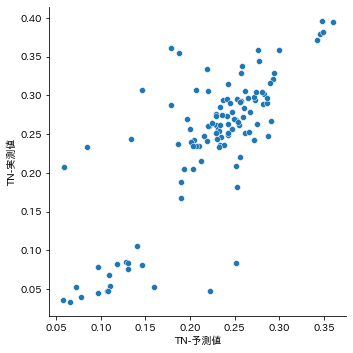

In [246]:
import japanize_matplotlib
plot_columns = pred_df.dropna(subset=[target_col])
preds = pred_df["pred" + target_col]
test_y = pred_df[target_col]
p = sns.relplot(x=preds, y=test_y)
p.set_axis_labels(f"{target_col}-予測値", f"{target_col}-実測値")

# 結果の出力

In [156]:
pred_df

,uniqueID,longitude,latitude,B2,B3,B4,B8,B11,B12,EC,...,TN,geometry,predpH1,predEC,predNH4,predNO3,predAvailN,predAvailP1,predTC,predTN
0,3.0,140.023143,40.271609,765,1120,916,3237,1878,1283,0.029,...,0.040,POINT (-68903.856 30470.614),6.515323,0.043513,1.537041,0.739670,4.295100,29.223224,0.984321,0.078276
1,104.0,140.079917,40.280592,702,940,971,2481,2169,1451,0.060,...,0.294,POINT (-64066.938 31425.426),6.214794,0.050601,1.238167,0.920936,5.165275,36.233521,2.747207,0.237449
2,105.0,140.080186,40.280862,672,915,997,2408,2258,1536,0.046,...,0.270,POINT (-64043.767 31455.153),6.265614,0.049731,1.168129,1.047509,5.395468,64.452142,2.081207,0.196611
3,106.0,140.080366,40.281041,813,1108,1124,2910,2399,1747,0.050,...,0.260,POINT (-64028.319 31474.971),6.429461,0.047443,1.282738,0.971422,4.219363,69.900053,2.723402,0.220761
4,10.0,140.022335,40.275292,747,1001,986,2592,1891,1273,0.036,...,0.076,POINT (-68968.874 30880.179),6.538059,0.047738,1.295322,0.857890,5.014323,30.196171,1.594119,0.130562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,41.0,140.059884,40.293887,589,851,785,2499,2287,1519,0.040,...,0.315,POINT (-65757.531 32916.263),6.277952,0.051777,1.308219,1.123527,5.311815,80.051656,4.334195,0.242853
470,44.0,140.059435,40.294785,633,962,885,2643,2179,1470,0.043,...,0.290,POINT (-65794.847 33016.337),6.277745,0.048702,1.453152,1.046858,5.136665,56.243372,3.067570,0.244798
471,37.0,140.056920,40.293169,619,940,924,2749,2052,1300,NaN,...,NaN,POINT (-66010.265 32838.675),6.379563,0.050026,1.781483,1.026730,5.078821,51.760525,2.277746,0.213128
472,75.0,140.067430,40.282479,549,795,710,2461,1554,935,0.051,...,0.251,POINT (-65126.937 31643.983),6.387747,0.049978,1.388817,1.308849,5.077585,70.914194,2.856101,0.228963


In [162]:
pred_df.to_csv('/workspaces/akita_daizu/data/474_pred_soil.csv')

In [157]:
score_df

,pH_score,EC_score,NO3_score,AvailN_score,AvailP_score,TC_score,TN_score
train_rmse,0.043856,0.000137,0.127500,5.282066,2809.708599,0.180734,0.000688
test_rmse,0.133921,0.000443,0.195783,8.914203,8795.304206,0.714127,0.003564
train_r2_score,0.796291,0.725566,0.473185,0.689019,0.593913,0.872131,0.901807
test_r2_score,0.476985,0.424898,0.111289,0.291733,0.112927,0.497155,0.482822


In [247]:
score_df

,pH_score,EC_score,NO3_score,AvailN_score,AvailP_score,TC_score,TN_score
train_rmse,0.204852,0.000137,0.127500,5.282066,2809.708599,0.180734,0.000688
test_rmse,0.365789,0.000443,0.195783,8.914203,8795.304206,0.714127,0.003564
train_r2_score,0.796291,0.725566,0.473185,0.689019,0.593913,0.872131,0.901807
test_r2_score,0.476985,0.424898,0.111289,0.291733,0.112927,0.497155,0.482822


In [201]:
score_df.to_csv('/workspaces/akita_daizu/data/474_pred_soil_score.csv')